In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from bartpy.bartpy.sklearnmodel import SklearnModel
from tqdm import tqdm

enter bartpy/bartpy/initializers/sklearntreeinitializer.py SklearnTreeInitializer __init__
-exit bartpy/bartpy/initializers/sklearntreeinitializer.py SklearnTreeInitializer __init__
enter bartpy/bartpy/initializers/sklearntreeinitializer.py SklearnTreeInitializer __init__
-exit bartpy/bartpy/initializers/sklearntreeinitializer.py SklearnTreeInitializer __init__
enter bartpy/bartpy/samplers/scalar.py NormalScalarSampler __init__
-exit bartpy/bartpy/samplers/scalar.py NormalScalarSampler __init__
enter bartpy/bartpy/samplers/scalar.py UniformScalarSampler __init__
-exit bartpy/bartpy/samplers/scalar.py UniformScalarSampler __init__
enter bartpy/bartpy/samplers/unconstrainedtree/proposer.py UniformMutationProposer __init__
enter bartpy/bartpy/samplers/scalar.py DiscreteSampler __init__
-exit bartpy/bartpy/samplers/scalar.py DiscreteSampler __init__
-exit bartpy/bartpy/samplers/unconstrainedtree/proposer.py UniformMutationProposer __init__
enter bartpy/bartpy/samplers/unconstrainedtree/lik

In [2]:
def treatment_effect(X, y, W, option=None):
    """
    returns a known treatment effect.
    """
    if option==None:
        print("Please specify treatment effect type: constant, linear")
    if option=="constant":
        return 0.5*W
    if option=="linear":
        return X[:,0]*W

def standardize(y):
    y_min, y_max = np.min(y), np.max(y)
    return -0.5 + ((y - y_min) / (y_max - y_min))

def standardize_TE(y, TE):
    y_min, y_max = np.min(y), np.max(y)
    return (TE / (y_max - y_min))

def TRV(y, W, p):
    return y*(W-p)/(p*(1-p))

Text(0.5, 1.0, 'X v y')

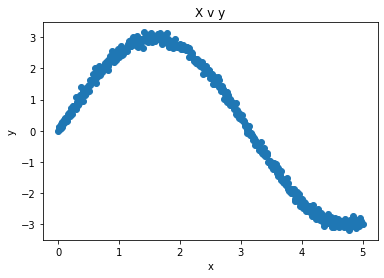

In [3]:
count = 500
x = np.linspace(0, 5, count)
X = pd.DataFrame(x).sample(frac=1.0).values
y = np.random.normal(0, 0.1, size=count) + np.sin(X[:, 0])*3
plt.scatter(X[:, 0], y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("X v y")

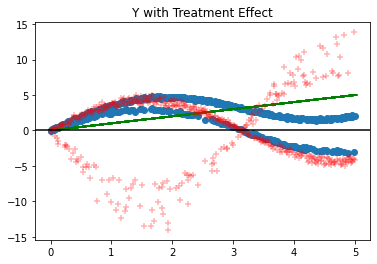

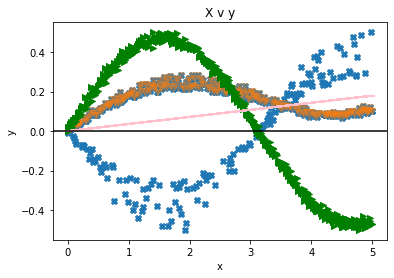

In [4]:
p = np.random.uniform(low=.6, high=.8, size=len(y))#np.ones(len(y))*p_of_T #
W = np.random.binomial(n =1, p=p, size = len(y))
Xp = np.array([X[:,0],p]).transpose()
TE= treatment_effect(X, y, W, option="linear")
theoretical_TE = treatment_effect(X, y, 1, option="linear") - treatment_effect(X, y, 0, option="linear")

plt.scatter(X[:,0], (y + TE))
plt.scatter(X[:,0], theoretical_TE, color="green", marker='_')
plt.scatter(X[:,0], TRV(y,W,p), color="red", marker='+', alpha=.3)
plt.axhline(y=0, color='black', linestyle='-')
plt.title("Y with Treatment Effect")
plt.show()

orig_y=y.copy()
orig_y_standard = standardize(orig_y)

y1=y.copy() + TE
y_i_star=TRV(y1,W,p)
y_i_star_standard = standardize(y_i_star)



plt.scatter(X[:, 0], y_i_star_standard, marker='X')
plt.scatter(X[W==1, 0], y_i_star_standard[W==1], marker='v', alpha=.3)
plt.scatter(X[:, 0], orig_y_standard[:], marker=">", color='green')
plt.scatter(X[:,0], standardize_TE(y_i_star, theoretical_TE), marker="_", color='pink')
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel("x")
plt.ylabel("y")
plt.title("X v y")
plt.show()


In [5]:
kwargs = {
    "model": "causal_gaussian_mixture"
}
model = SklearnModel(
    n_samples=20,#0,#1000, 
    n_burn=20,#0, 
    n_trees=5,#0,#100, 
    thin=.2,
    n_chains=4,
    n_jobs=-1,
    store_in_sample_predictions=True,
    **kwargs
)
model_with_p = SklearnModel(
    n_samples=200,#1000, 
    n_burn=200, 
    n_trees=50,#100, 
    thin=.2,
    n_chains=4,
    n_jobs=-1,
    store_in_sample_predictions=True,
    **kwargs
)

enter bartpy/bartpy/sklearnmodel.py SklearnModel __init__
Causal Gaussian Mixture using Transformed Outcomes...
enter bartpy/bartpy/samplers/leafnode.py LeafNodeSampler __init__
-exit bartpy/bartpy/samplers/leafnode.py LeafNodeSampler __init__
enter bartpy/bartpy/samplers/schedule.py SampleScheduleCGM __init__
-exit bartpy/bartpy/samplers/schedule.py SampleScheduleCGM __init__
-exit bartpy/bartpy/sklearnmodel.py SklearnModel __init__
enter bartpy/bartpy/sklearnmodel.py SklearnModel __init__
Causal Gaussian Mixture using Transformed Outcomes...
enter bartpy/bartpy/samplers/leafnode.py LeafNodeSampler __init__
-exit bartpy/bartpy/samplers/leafnode.py LeafNodeSampler __init__
enter bartpy/bartpy/samplers/schedule.py SampleScheduleCGM __init__
-exit bartpy/bartpy/samplers/schedule.py SampleScheduleCGM __init__
-exit bartpy/bartpy/sklearnmodel.py SklearnModel __init__


In [6]:
model.fit_CGM(X, y_i_star_standard, W, p)
model_with_p.fit_CGM(Xp, y_i_star_standard, W, p)

enter bartpy/bartpy/sklearnmodel.py SklearnModel fit_CGM
enter bartpy/bartpy/sklearnmodel.py SklearnModel _construct_model_cgm
enter bartpy/bartpy/sklearnmodel.py SklearnModel _convert_covariates_to_data_cgm
-exit bartpy/bartpy/sklearnmodel.py SklearnModel _convert_covariates_to_data_cgm
enter bartpy/bartpy/sigma.py Sigma __init__
-exit bartpy/bartpy/sigma.py Sigma __init__
enter bartpy/bartpy/sigma.py Sigma __init__
-exit bartpy/bartpy/sigma.py Sigma __init__
enter bartpy/bartpy/sigma.py Sigma __init__
-exit bartpy/bartpy/sigma.py Sigma __init__
enter bartpy/bartpy/model.py ModelCGM __init__
**********************************************
in if trees_g is None
enter bartpy/bartpy/model.py ModelCGM initialize_trees_g
-exit bartpy/bartpy/model.py ModelCGM initialize_trees_g
in if trees_h is None
enter bartpy/bartpy/model.py ModelCGM initialize_trees_h
-exit bartpy/bartpy/model.py ModelCGM initialize_trees_h
-exit bartpy/bartpy/model.py ModelCGM __init__
-exit bartpy/bartpy/sklearnmodel.p

SklearnModel(n_trees=50, store_in_sample_predictions=True, thin=0.2)

In [7]:
pred_CATE = model.predict_CATE(X)
pred_response = model.predict_response(X)

pred_CATE_p = model_with_p.predict_CATE(Xp)
pred_response_p = model_with_p.predict_response(Xp)

enter bartpy/bartpy/sklearnmodel.py SklearnModel predict
enter bartpy/bartpy/sklearnmodel.py SklearnModel _out_of_sample_predict_cate
enter bartpy/bartpy/model.py ModelCGM predict_g
enter bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM trees_g
type(self.trees_g)= <class 'list'>
enter bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_g
enter bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_g
-exit bartpy/bartpy/model.py ModelCGM predict_g
enter bartpy/bartpy/model.py ModelCGM predict_g
enter bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM trees_g
type(self.trees_g)= <class 'list'>
enter bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_g
enter bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_g
-exit bartpy/bartpy/model.py Mod

-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_g
-exit bartpy/bartpy/model.py ModelCGM predict_g
enter bartpy/bartpy/model.py ModelCGM predict_g
enter bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM trees_g
type(self.trees_g)= <class 'list'>
enter bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_g
enter bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_g
-exit bartpy/bartpy/model.py ModelCGM predict_g
enter bartpy/bartpy/model.py ModelCGM predict_g
enter bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM trees_g
type(self.trees_g)= <class 'list'>
enter bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_g
enter bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_g
-exit bartpy/bartpy/model.py ModelCGM predict_g
enter b

-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_g
-exit bartpy/bartpy/model.py ModelCGM predict_g
enter bartpy/bartpy/model.py ModelCGM predict_g
enter bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM trees_g
type(self.trees_g)= <class 'list'>
enter bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_g
enter bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_g
-exit bartpy/bartpy/model.py ModelCGM predict_g
enter bartpy/bartpy/model.py ModelCGM predict_g
enter bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM trees_g
type(self.trees_g)= <class 'list'>
enter bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_g
enter bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_g
-exit bartpy/bartpy/model.py ModelCGM predict_g
enter b

-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_g
-exit bartpy/bartpy/model.py ModelCGM predict_g
enter bartpy/bartpy/model.py ModelCGM predict_g
enter bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM trees_g
type(self.trees_g)= <class 'list'>
enter bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_g
enter bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_g
-exit bartpy/bartpy/model.py ModelCGM predict_g
enter bartpy/bartpy/model.py ModelCGM predict_g
enter bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM trees_g
type(self.trees_g)= <class 'list'>
enter bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_g
enter bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_g
-exit bartpy/bartpy/model.py ModelCGM predict_g
enter b

enter bartpy/bartpy/model.py ModelCGM predict_g
enter bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM trees_g
type(self.trees_g)= <class 'list'>
enter bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_g
enter bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_g
-exit bartpy/bartpy/model.py ModelCGM predict_g
enter bartpy/bartpy/model.py ModelCGM predict_g
enter bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM trees_g
type(self.trees_g)= <class 'list'>
enter bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_g
enter bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_g
-exit bartpy/bartpy/model.py ModelCGM predict_g
enter bartpy/bartpy/model.py ModelCGM predict_g
enter bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/mode

-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_h
-exit bartpy/bartpy/model.py ModelCGM predict_h
enter bartpy/bartpy/model.py ModelCGM predict_h
enter bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM trees_h
type(self.trees_h)= <class 'list'>
enter bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_h
enter bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_h
-exit bartpy/bartpy/model.py ModelCGM predict_h
enter bartpy/bartpy/model.py ModelCGM predict_h
enter bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM trees_h
type(self.trees_h)= <class 'list'>
enter bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_h
enter bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_h
-exit bartpy/bartpy/model.py ModelCGM predict_h
enter b

-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_h
-exit bartpy/bartpy/model.py ModelCGM predict_h
enter bartpy/bartpy/model.py ModelCGM predict_h
enter bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM trees_h
type(self.trees_h)= <class 'list'>
enter bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_h
enter bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_h
-exit bartpy/bartpy/model.py ModelCGM predict_h
enter bartpy/bartpy/model.py ModelCGM predict_h
enter bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM trees_h
type(self.trees_h)= <class 'list'>
enter bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_h
enter bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_h
-exit bartpy/bartpy/model.py ModelCGM predict_h
enter b

-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_h
-exit bartpy/bartpy/model.py ModelCGM predict_h
enter bartpy/bartpy/model.py ModelCGM predict_h
enter bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM trees_h
type(self.trees_h)= <class 'list'>
enter bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_h
enter bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_h
-exit bartpy/bartpy/model.py ModelCGM predict_h
enter bartpy/bartpy/model.py ModelCGM predict_h
enter bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM trees_h
type(self.trees_h)= <class 'list'>
enter bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_h
enter bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_h
-exit bartpy/bartpy/model.py ModelCGM predict_h
enter b

-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_h
-exit bartpy/bartpy/model.py ModelCGM predict_h
enter bartpy/bartpy/model.py ModelCGM predict_h
enter bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM trees_h
type(self.trees_h)= <class 'list'>
enter bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_h
enter bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_h
-exit bartpy/bartpy/model.py ModelCGM predict_h
enter bartpy/bartpy/model.py ModelCGM predict_h
enter bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM trees_h
type(self.trees_h)= <class 'list'>
enter bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_h
enter bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_h
-exit bartpy/bartpy/model.py ModelCGM predict_h
enter b

-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_h
-exit bartpy/bartpy/model.py ModelCGM predict_h
enter bartpy/bartpy/model.py ModelCGM predict_h
enter bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM trees_h
type(self.trees_h)= <class 'list'>
enter bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_h
enter bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_h
-exit bartpy/bartpy/model.py ModelCGM predict_h
enter bartpy/bartpy/model.py ModelCGM predict_h
enter bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM trees_h
type(self.trees_h)= <class 'list'>
enter bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_h
enter bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_h
-exit bartpy/bartpy/model.py ModelCGM predict_h
enter b

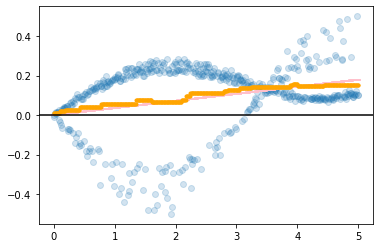

In [8]:
plt.scatter(X[:, 0], y_i_star_standard, alpha = .2)
plt.plot(X[:,0], pred_CATE, '.', color='orange')
plt.scatter(X[:,0], standardize_TE(y_i_star, theoretical_TE), marker="_", color='pink')
plt.axhline(y=0, color='black', linestyle='-')

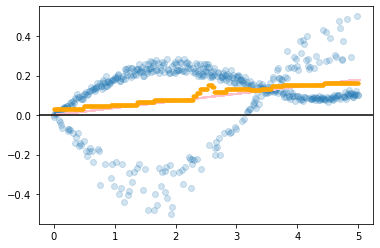

In [9]:
plt.scatter(X[:, 0], y_i_star_standard, alpha = .2)
plt.plot(X, pred_response, '.', color='orange')
plt.scatter(X[:,0], standardize_TE(y_i_star, theoretical_TE), marker="_", color='pink')
plt.axhline(y=0, color='black', linestyle='-')

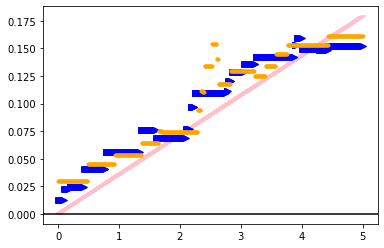

In [10]:
plt.plot(X, pred_CATE, '>', color='blue')
plt.plot(X, pred_response, '.', color='orange')
plt.scatter(X[:,0], standardize_TE(y_i_star, theoretical_TE), marker="_", color='pink')
plt.axhline(y=0, color='black', linestyle='-')

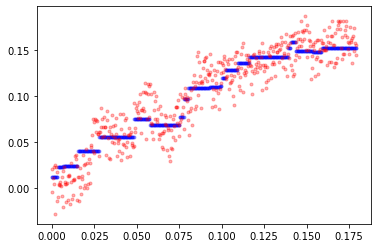

0.00017526593144050984
0.0004263944398725331


In [11]:
# Difference in predicted vs actual
plt.plot(standardize_TE(y_i_star, theoretical_TE), pred_CATE, '.', color='blue', alpha=.3)
plt.plot(standardize_TE(y_i_star, theoretical_TE), pred_CATE_p, '.', color='red', alpha=.3)
plt.show()
print(np.var(standardize_TE(y_i_star, theoretical_TE)- pred_CATE))
print(np.var(standardize_TE(y_i_star, theoretical_TE)- pred_CATE_p))

In [12]:
#model.model_samples_cgm[0].residuals()#.prediction_samples()

In [13]:
#(model._prediction_samples_g)[10]

In [14]:
model._prediction_samples_g.shape

(16, 500)

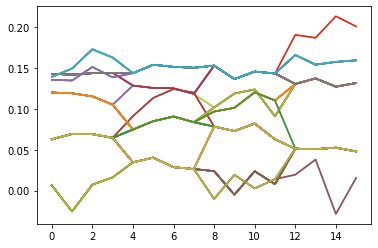

In [15]:
for i in range(100):
    plt.plot(model._prediction_samples_g[:,i])

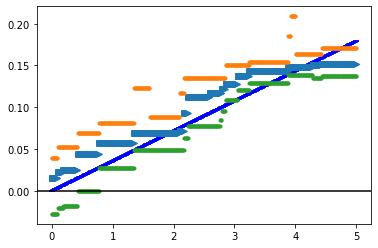

In [16]:
#meds = np.zeros(X.shape[0])
#for i in tqdm(range(X.shape[0])):

meds = np.median(model._prediction_samples_g, axis=0)
q_025 = np.quantile(model._prediction_samples_g,q=0.975, axis=0)
q_975 = np.quantile(model._prediction_samples_g,q=0.025, axis=0)

plt.plot(X[:,0], meds, '>')
plt.plot(X[:,0], q_025, '.')
plt.plot(X[:,0], q_975, '.')
plt.scatter(X[:,0], standardize_TE(y_i_star, theoretical_TE), marker="_", color='b')
plt.axhline(y=0, color='black', linestyle='-')
#plt.plot(X[W==1,0], TE[W==1], color='red')


In [17]:
#model._combine_chains(model.extract)

In [18]:
model._combine_chains(model.extract)['in_sample_predictions_g'].shape

enter bartpy/bartpy/sklearnmodel.py SklearnModel _combine_chains
-exit bartpy/bartpy/sklearnmodel.py SklearnModel _combine_chains


(16, 500)

In [19]:
i=3
values_h = model._combine_chains(model.extract)['model'][i].predict_h(X)
values_g = model._combine_chains(model.extract)['model'][i].predict_g(X)

enter bartpy/bartpy/sklearnmodel.py SklearnModel _combine_chains
-exit bartpy/bartpy/sklearnmodel.py SklearnModel _combine_chains
enter bartpy/bartpy/model.py ModelCGM predict_h
enter bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM trees_h
type(self.trees_h)= <class 'list'>
enter bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_h
enter bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM trees_h
-exit bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_h
-exit bartpy/bartpy/model.py ModelCGM predict_h
enter bartpy/bartpy/sklearnmodel.py SklearnModel _combine_chains
-exit bartpy/bartpy/sklearnmodel.py SklearnModel _combine_chains
enter bartpy/bartpy/model.py ModelCGM predict_g
enter bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM trees_g
type(self.trees_g)= <class 'list'>
enter bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_g
enter bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/ba

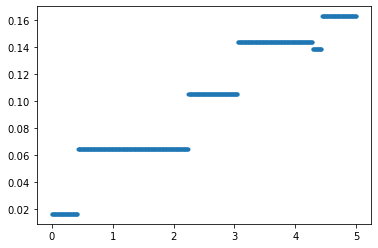

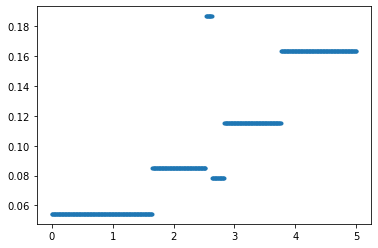

In [20]:
plt.plot(X, values_g,'.')
plt.show()
plt.plot(X, values_h,'.')

In [21]:
L=model._combine_chains(model.extract)['model']
current_unnormalized_value = np.zeros(len(L))
current_value = np.zeros(len(L))
scaling_factor = np.zeros(len(L))
for i in range(len(L)):
    current_unnormalized_value[i] = model._combine_chains(model.extract)['model'][i].sigma_g.current_unnormalized_value()
    current_value[i] = model._combine_chains(model.extract)['model'][i].sigma_g.current_value()
    scaling_factor[i] =model._combine_chains(model.extract)['model'][i].sigma_g.scaling_factor
    

enter bartpy/bartpy/sklearnmodel.py SklearnModel _combine_chains
-exit bartpy/bartpy/sklearnmodel.py SklearnModel _combine_chains
enter bartpy/bartpy/sklearnmodel.py SklearnModel _combine_chains
-exit bartpy/bartpy/sklearnmodel.py SklearnModel _combine_chains
enter bartpy/bartpy/model.py ModelCGM sigma_g
-exit bartpy/bartpy/model.py ModelCGM sigma_g
enter bartpy/bartpy/sigma.py Sigma current_value
enter bartpy/bartpy/sigma.py Sigma current_value
-exit bartpy/bartpy/sigma.py Sigma current_value
-exit bartpy/bartpy/sigma.py Sigma current_value
enter bartpy/bartpy/sklearnmodel.py SklearnModel _combine_chains
-exit bartpy/bartpy/sklearnmodel.py SklearnModel _combine_chains
enter bartpy/bartpy/model.py ModelCGM sigma_g
-exit bartpy/bartpy/model.py ModelCGM sigma_g
enter bartpy/bartpy/sigma.py Sigma current_value
-exit bartpy/bartpy/sigma.py Sigma current_value
enter bartpy/bartpy/sklearnmodel.py SklearnModel _combine_chains
-exit bartpy/bartpy/sklearnmodel.py SklearnModel _combine_chains
en

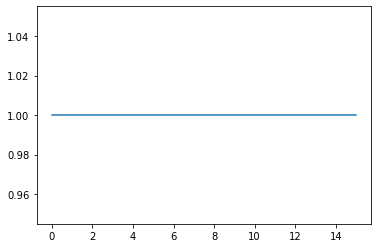

In [22]:
#plt.plot(current_unnormalized_value)
#plt.plot(current_value)
plt.plot(scaling_factor)

enter bartpy/bartpy/sklearnmodel.py SklearnModel _combine_chains
-exit bartpy/bartpy/sklearnmodel.py SklearnModel _combine_chains


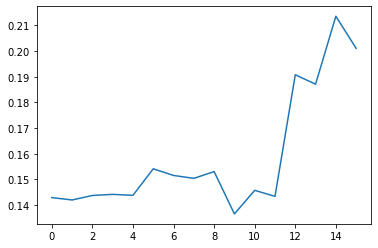

In [23]:
plt.plot(model._combine_chains(model.extract)['in_sample_predictions_g'][:,200])
#plt.ylim((-2,2))

In [24]:
np.median(model._combine_chains(model.extract)['in_sample_predictions_g'][:,200])

enter bartpy/bartpy/sklearnmodel.py SklearnModel _combine_chains
-exit bartpy/bartpy/sklearnmodel.py SklearnModel _combine_chains


0.14810719057047517

In [25]:
reg_model = SklearnModel(
    n_samples=20,#0,#1000, 
    n_burn=20,#0, 
    n_trees=5,#0,#100, 
    thin=1,
    n_chains=1,
    n_jobs=1,#-1,
    store_in_sample_predictions=True,
)

reg_model.fit(X,y_i_star_standard)
y_pred=reg_model.predict(X)

  0%|          | 0/20 [00:00<?, ?it/s]

enter bartpy/bartpy/sklearnmodel.py SklearnModel __init__
enter bartpy/bartpy/samplers/leafnode.py LeafNodeSampler __init__
-exit bartpy/bartpy/samplers/leafnode.py LeafNodeSampler __init__
enter bartpy/bartpy/samplers/schedule.py SampleSchedule __init__
-exit bartpy/bartpy/samplers/schedule.py SampleSchedule __init__
-exit bartpy/bartpy/sklearnmodel.py SklearnModel __init__
enter bartpy/bartpy/sklearnmodel.py SklearnModel fit
enter bartpy/bartpy/sklearnmodel.py SklearnModel _construct_model
enter bartpy/bartpy/sklearnmodel.py SklearnModel _convert_covariates_to_data
-exit bartpy/bartpy/sklearnmodel.py SklearnModel _convert_covariates_to_data
enter bartpy/bartpy/sigma.py Sigma __init__
-exit bartpy/bartpy/sigma.py Sigma __init__
enter bartpy/bartpy/model.py Model __init__
in if trees is None
enter bartpy/bartpy/model.py Model initialize_trees
-exit bartpy/bartpy/model.py Model initialize_trees
-exit bartpy/bartpy/model.py Model __init__
-exit bartpy/bartpy/sklearnmodel.py SklearnModel 

 15%|█▌        | 3/20 [00:00<00:00, 22.51it/s]

enter bartpy/bartpy/samplers/leafnode.py LeafNodeSampler step
enter bartpy/bartpy/samplers/leafnode.py LeafNodeSampler sample
enter bartpy/bartpy/model.py Model sigma_m
-exit bartpy/bartpy/model.py Model sigma_m
enter bartpy/bartpy/model.py Model sigma
-exit bartpy/bartpy/model.py Model sigma
enter bartpy/bartpy/sigma.py Sigma current_value
-exit bartpy/bartpy/sigma.py Sigma current_value
enter bartpy/bartpy/samplers/scalar.py NormalScalarSampler sample
-exit bartpy/bartpy/samplers/scalar.py NormalScalarSampler sample
-exit bartpy/bartpy/samplers/leafnode.py LeafNodeSampler sample
-exit bartpy/bartpy/samplers/leafnode.py LeafNodeSampler step
enter bartpy/bartpy/samplers/leafnode.py LeafNodeSampler step
enter bartpy/bartpy/samplers/leafnode.py LeafNodeSampler sample
enter bartpy/bartpy/model.py Model sigma_m
-exit bartpy/bartpy/model.py Model sigma_m
enter bartpy/bartpy/model.py Model sigma
-exit bartpy/bartpy/model.py Model sigma
enter bartpy/bartpy/sigma.py Sigma current_value
-exit b

-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_split
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_split_within_tree
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_splittable_leaf_nodes
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_splittable_leaf_nodes
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_split_within_node
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_split_within_node
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_split_within_tree
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_tree_ratio_grow
exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_tree_ratio
enter bartpy/bartpy/samplers/scalar.py UniformScalarSampler sample
-exit bartpy/bartpy/samplers/scalar.py Uniform

 35%|███▌      | 7/20 [00:00<00:00, 18.78it/s]

enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_transition_ratio
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_prune_transition_ratio
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_splittable_leaf_nodes
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_splittable_leaf_nodes
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_splittable_leaf_nodes
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_splittable_leaf_nodes
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_split_within_node
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_split_within_node
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_prunable_decision_nodes
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_prunable_decision_nodes
-exit bartpy/bartpy/samplers/u

-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_grow_ratio
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_likihood_ratio_prune
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_likihood_ratio
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_tree_ratio
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_tree_ratio_prune
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_proba

 60%|██████    | 12/20 [00:00<00:00, 18.33it/s]

enter bartpy/bartpy/samplers/scalar.py NormalScalarSampler sample
-exit bartpy/bartpy/samplers/scalar.py NormalScalarSampler sample
-exit bartpy/bartpy/samplers/leafnode.py LeafNodeSampler sample
-exit bartpy/bartpy/samplers/leafnode.py LeafNodeSampler step
enter bartpy/bartpy/samplers/unconstrainedtree/proposer.py UniformMutationProposer propose
enter bartpy/bartpy/samplers/scalar.py DiscreteSampler sample
-exit bartpy/bartpy/samplers/scalar.py DiscreteSampler sample
enter bartpy/bartpy/samplers/unconstrainedtree/proposer.py uniformly_sample_prune_mutation
enter bartpy/bartpy/samplers/unconstrainedtree/proposer.py random_prunable_decision_node
-exit bartpy/bartpy/samplers/unconstrainedtree/proposer.py random_prunable_decision_node
-exit bartpy/bartpy/samplers/unconstrainedtree/proposer.py uniformly_sample_prune_mutation
-exit bartpy/bartpy/samplers/unconstrainedtree/proposer.py UniformMutationProposer propose
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeM

-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_transition_ratio
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_likihood_ratio
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_likihood_ratio_grow
enter bartpy/bartpy/model.py Model sigma
-exit bartpy/bartpy/model.py Model sigma
enter bartpy/bartpy/model.py Model sigma_m
-exit bartpy/bartpy/model.py Model sigma_m
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_grow_ratio
enter bartpy/bartpy/sigma.py Sigma current_value
-exit bartpy/bartpy/sigma.py Sigma current_value
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_grow_ratio
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_likihood_ratio_grow
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log

 70%|███████   | 14/20 [00:00<00:00, 18.03it/s]

enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_tree_ratio
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_tree_ratio_grow
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_split
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_split
enter bartpy/bartpy

 80%|████████  | 16/20 [00:00<00:00, 17.73it/s]

 UniformTreeMutationLikihoodRatio log_prune_transition_ratio
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_splittable_leaf_nodes
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_splittable_leaf_nodes
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_splittable_leaf_nodes
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_splittable_leaf_nodes
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_split_within_node
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_split_within_node
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_prunable_decision_nodes
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_prunable_decision_nodes
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_prune_transition_ratio
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLiki

 90%|█████████ | 18/20 [00:00<00:00, 17.71it/s]

UniformTreeMutationLikihoodRatio log_tree_ratio
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_tree_ratio_grow
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_split
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_split
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_spl

  0%|          | 0/20 [00:00<?, ?it/s]


-exit bartpy/bartpy/model.py Model sigma
enter bartpy/bartpy/samplers/sigma.py SigmaSampler step
enter bartpy/bartpy/samplers/sigma.py SigmaSampler sample
enter bartpy/bartpy/model.py Model residuals
enter bartpy/bartpy/model.py Model predict
CALLING PREDICT FROM THE WRONG CLASS!!!!!! THIS IS THE Model CLASS.....
enter bartpy/bartpy/model.py Model trees
-exit bartpy/bartpy/model.py Model trees
-exit bartpy/bartpy/model.py Model predict
-exit bartpy/bartpy/model.py Model residuals
-exit bartpy/bartpy/samplers/sigma.py SigmaSampler sample
enter bartpy/bartpy/sigma.py Sigma set_value
-exit bartpy/bartpy/sigma.py Sigma set_value
-exit bartpy/bartpy/samplers/sigma.py SigmaSampler step
-exit bartpy/bartpy/samplers/schedule.py SampleSchedule steps
Starting sampling
enter bartpy/bartpy/samplers/schedule.py SampleSchedule steps
enter bartpy/bartpy/model.py Model refreshed_trees
enter bartpy/bartpy/samplers/unconstrainedtree/proposer.py UniformMutationProposer propose
enter bartpy/bartpy/sample

 15%|█▌        | 3/20 [00:00<00:00, 22.17it/s]

-exit bartpy/bartpy/model.py deep_copy_model
enter bartpy/bartpy/samplers/schedule.py SampleSchedule steps
enter bartpy/bartpy/model.py Model refreshed_trees
enter bartpy/bartpy/samplers/unconstrainedtree/proposer.py UniformMutationProposer propose
enter bartpy/bartpy/samplers/scalar.py DiscreteSampler sample
-exit bartpy/bartpy/samplers/scalar.py DiscreteSampler sample
enter bartpy/bartpy/samplers/unconstrainedtree/proposer.py uniformly_sample_grow_mutation
enter bartpy/bartpy/samplers/unconstrainedtree/proposer.py random_splittable_leaf_node
-exit bartpy/bartpy/samplers/unconstrainedtree/proposer.py random_splittable_leaf_node
enter bartpy/bartpy/samplers/unconstrainedtree/proposer.py sample_split_node
enter bartpy/bartpy/samplers/unconstrainedtree/proposer.py sample_split_condition
-exit bartpy/bartpy/samplers/unconstrainedtree/proposer.py sample_split_condition
-exit bartpy/bartpy/samplers/unconstrainedtree/proposer.py sample_split_node
-exit bartpy/bartpy/samplers/unconstrainedtre

 25%|██▌       | 5/20 [00:00<00:00, 21.17it/s]


enter bartpy/bartpy/samplers/scalar.py NormalScalarSampler sample
-exit bartpy/bartpy/samplers/scalar.py NormalScalarSampler sample
-exit bartpy/bartpy/samplers/leafnode.py LeafNodeSampler sample
-exit bartpy/bartpy/samplers/leafnode.py LeafNodeSampler step
enter bartpy/bartpy/samplers/unconstrainedtree/proposer.py UniformMutationProposer propose
enter bartpy/bartpy/samplers/scalar.py DiscreteSampler sample
-exit bartpy/bartpy/samplers/scalar.py DiscreteSampler sample
enter bartpy/bartpy/samplers/unconstrainedtree/proposer.py uniformly_sample_prune_mutation
enter bartpy/bartpy/samplers/unconstrainedtree/proposer.py random_prunable_decision_node
-exit bartpy/bartpy/samplers/unconstrainedtree/proposer.py random_prunable_decision_node
-exit bartpy/bartpy/samplers/unconstrainedtree/proposer.py uniformly_sample_prune_mutation
-exit bartpy/bartpy/samplers/unconstrainedtree/proposer.py UniformMutationProposer propose
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTree

 35%|███▌      | 7/20 [00:00<00:00, 19.87it/s]

-exit bartpy/bartpy/samplers/unconstrainedtree/proposer.py sample_split_condition
-exit bartpy/bartpy/samplers/unconstrainedtree/proposer.py sample_split_node
-exit bartpy/bartpy/samplers/unconstrainedtree/proposer.py uniformly_sample_grow_mutation
-exit bartpy/bartpy/samplers/unconstrainedtree/proposer.py UniformMutationProposer propose
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_transition_ratio
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_grow_transition_ratio
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_prunable_decision_nodes
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_prunable_decision_nodes
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_split_within_tree
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_splittable_leaf_nodes
-exit bartpy/bartpy/samplers/unconstrainedtree/likiho

 45%|████▌     | 9/20 [00:00<00:00, 19.47it/s]


-exit bartpy/bartpy/model.py Model sigma_m
enter bartpy/bartpy/model.py Model sigma
-exit bartpy/bartpy/model.py Model sigma
enter bartpy/bartpy/sigma.py Sigma current_value
-exit bartpy/bartpy/sigma.py Sigma current_value
enter bartpy/bartpy/samplers/scalar.py NormalScalarSampler sample
-exit bartpy/bartpy/samplers/scalar.py NormalScalarSampler sample
-exit bartpy/bartpy/samplers/leafnode.py LeafNodeSampler sample
-exit bartpy/bartpy/samplers/leafnode.py LeafNodeSampler step
enter bartpy/bartpy/samplers/unconstrainedtree/proposer.py UniformMutationProposer propose
enter bartpy/bartpy/samplers/scalar.py DiscreteSampler sample
-exit bartpy/bartpy/samplers/scalar.py DiscreteSampler sample
enter bartpy/bartpy/samplers/unconstrainedtree/proposer.py uniformly_sample_grow_mutation
enter bartpy/bartpy/samplers/unconstrainedtree/proposer.py random_splittable_leaf_node
-exit bartpy/bartpy/samplers/unconstrainedtree/proposer.py random_splittable_leaf_node
enter bartpy/bartpy/samplers/unconstrai

 55%|█████▌    | 11/20 [00:00<00:00, 18.51it/s]

enter bartpy/bartpy/samplers/unconstrainedtree/proposer.py uniformly_sample_prune_mutation
enter bartpy/bartpy/samplers/unconstrainedtree/proposer.py random_prunable_decision_node
-exit bartpy/bartpy/samplers/unconstrainedtree/proposer.py random_prunable_decision_node
-exit bartpy/bartpy/samplers/unconstrainedtree/proposer.py uniformly_sample_prune_mutation
-exit bartpy/bartpy/samplers/unconstrainedtree/proposer.py UniformMutationProposer propose
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_transition_ratio
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_prune_transition_ratio
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_splittable_leaf_nodes
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_splittable_leaf_nodes
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_splittable_leaf_nodes
-exit bartpy/bartpy/samplers/unconstrainedt

 65%|██████▌   | 13/20 [00:00<00:00, 18.78it/s]


-exit bartpy/bartpy/samplers/unconstrainedtree/proposer.py uniformly_sample_grow_mutation
-exit bartpy/bartpy/samplers/unconstrainedtree/proposer.py UniformMutationProposer propose
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_transition_ratio
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_grow_transition_ratio
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_prunable_decision_nodes
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_prunable_decision_nodes
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_split_within_tree
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_splittable_leaf_nodes
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_splittable_leaf_nodes
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_split_within_node
-exit bartpy/bartpy/sampl

 75%|███████▌  | 15/20 [00:00<00:00, 18.26it/s]

-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_likihood_ratio
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_tree_ratio
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_tree_ratio_prune
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node

enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_tree_ratio
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_tree_ratio_grow
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_split
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_split
enter bartpy/bartpy

100%|██████████| 20/20 [00:01<00:00, 18.65it/s]

enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_split_within_node
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_split_within_node
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_split_within_tree
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_tree_ratio_grow
exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_tree_ratio
enter bartpy/bartpy/samplers/scalar.py UniformScalarSampler sample
-exit bartpy/bartpy/samplers/scalar.py UniformScalarSampler sample
enter bartpy/bartpy/samplers/leafnode.py LeafNodeSampler step
enter bartpy/bartpy/samplers/leafnode.py LeafNodeSampler sample
enter bartpy/bartpy/model.py Model sigma_m
-exit bartpy/bartpy/model.py Model sigma_m
enter bartpy/bartpy/model.py Model sigma
-exit bartpy/bartpy/model.py Model sigma
enter bartpy/bartpy/sigma.py Sigma current_value
-

-exit bartpy/bartpy/model.py Model _out_of_sample_predict
-exit bartpy/bartpy/model.py Model predict
enter bartpy/bartpy/model.py Model predict
CALLING PREDICT FROM THE WRONG CLASS!!!!!! THIS IS THE Model CLASS.....
enter bartpy/bartpy/model.py Model _out_of_sample_predict
enter bartpy/bartpy/model.py Model trees
-exit bartpy/bartpy/model.py Model trees
-exit bartpy/bartpy/model.py Model _out_of_sample_predict
-exit bartpy/bartpy/model.py Model predict
enter bartpy/bartpy/model.py Model predict
CALLING PREDICT FROM THE WRONG CLASS!!!!!! THIS IS THE Model CLASS.....
enter bartpy/bartpy/model.py Model _out_of_sample_predict
enter bartpy/bartpy/model.py Model trees
-exit bartpy/bartpy/model.py Model trees
-exit bartpy/bartpy/model.py Model _out_of_sample_predict
-exit bartpy/bartpy/model.py Model predict
enter bartpy/bartpy/model.py Model predict
CALLING PREDICT FROM THE WRONG CLASS!!!!!! THIS IS THE Model CLASS.....
enter bartpy/bartpy/model.py Model _out_of_sample_predict
enter bartpy/b

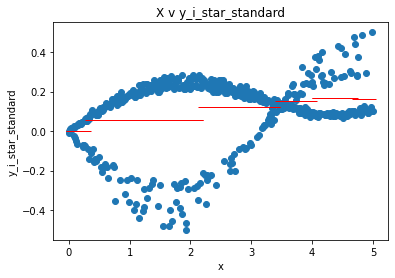

In [26]:
plt.scatter(X[:, 0], y_i_star_standard)
plt.plot(X, y_pred,'_', color='red')
plt.xlabel("x")
plt.ylabel("y_i_star_standard")
plt.title("X v y_i_star_standard")
plt.show()


In [27]:
L=model._combine_chains(reg_model.extract)['model']
current_unnormalized_value = np.zeros(len(L))
current_value = np.zeros(len(L))
scaling_factor = np.zeros(len(L))
for i in range(len(L)):
    current_unnormalized_value[i] = reg_model._combine_chains(reg_model.extract)['model'][i].sigma.current_unnormalized_value()
    current_value[i] = reg_model._combine_chains(reg_model.extract)['model'][i].sigma.current_value()
    scaling_factor[i]= reg_model._combine_chains(reg_model.extract)['model'][i].sigma.scaling_factor
    

enter bartpy/bartpy/sklearnmodel.py SklearnModel _combine_chains
-exit bartpy/bartpy/sklearnmodel.py SklearnModel _combine_chains
enter bartpy/bartpy/sklearnmodel.py SklearnModel _combine_chains
-exit bartpy/bartpy/sklearnmodel.py SklearnModel _combine_chains
enter bartpy/bartpy/model.py Model sigma
-exit bartpy/bartpy/model.py Model sigma
enter bartpy/bartpy/sigma.py Sigma current_value
enter bartpy/bartpy/sigma.py Sigma current_value
-exit bartpy/bartpy/sigma.py Sigma current_value
-exit bartpy/bartpy/sigma.py Sigma current_value
enter bartpy/bartpy/sklearnmodel.py SklearnModel _combine_chains
-exit bartpy/bartpy/sklearnmodel.py SklearnModel _combine_chains
enter bartpy/bartpy/model.py Model sigma
-exit bartpy/bartpy/model.py Model sigma
enter bartpy/bartpy/sigma.py Sigma current_value
-exit bartpy/bartpy/sigma.py Sigma current_value
enter bartpy/bartpy/sklearnmodel.py SklearnModel _combine_chains
-exit bartpy/bartpy/sklearnmodel.py SklearnModel _combine_chains
enter bartpy/bartpy/mo

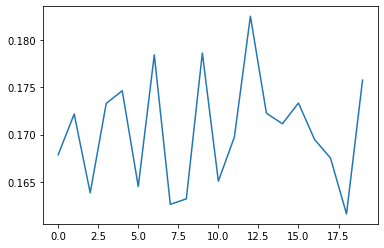

In [28]:
plt.plot(current_value)

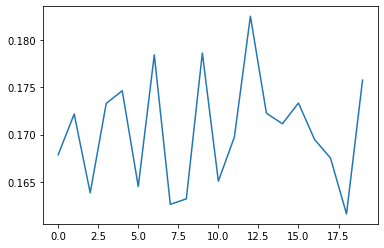

In [29]:
plt.plot(current_unnormalized_value)

In [30]:
(X).shape
aslkdnf


NameError: name 'aslkdnf' is not defined